# Parental Discretion Model using Logistic Regression


DATASET LOAD

In [1]:
#Loading the dataset
import pandas as pd
import nltk
import re
df=pd.read_csv('NLP.csv')
df.head(5)

,Social Media Message,Type
0,looting will lead to shooting,1
1,‘I’ll show him things he’s never seen before l...,1
2,We will together gangrape her,1
3,I will make sure you will be raped and murdere...,1
4,Watch your last breath,1


In [2]:
#First line of the dataset
df['Social Media Message'][0]

'looting will lead to shooting'

PRE PROCESSING THE DATA

In [3]:
#Pre Processing
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from string import punctuation
import re
import string
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence) #converting to string
    sentence = sentence.lower()#lower the sentence    
    cleanr = re.compile('<.*?>') #defining html tags
    cleantext = re.sub(cleanr, '', sentence)#remove html tags
    rem_url=re.sub(r'http\S+', '',cleantext)# remove url links
    rem_num = re.sub('[0-9]+', '', rem_url) #remove numbers
    tokens = word_tokenize(rem_num) #tokenization
    tokens = ([char.lower() for char in tokens  if char not in string.punctuation]) #removing punctuations 
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]#stopword removal
    stem_words=[stemmer.stem(w) for w in filtered_words]#stemming    
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]#lemmatizing
    return " ".join(filtered_words)

df['cleanText']=df['Social Media Message'].apply(preprocess)#storing the preprocessed data
df.head(10)

,Social Media Message,Type,cleanText
0,looting will lead to shooting,1,looting lead shooting
1,‘I’ll show him things he’s never seen before l...,1,show things never seen like side d**k slice
2,We will together gangrape her,1,together gangrape
3,I will make sure you will be raped and murdere...,1,make sure raped murdered bitch commit suicide ...
4,Watch your last breath,1,watch last breath
5,"She is dangerously close to a long, slow painf...",1,dangerously close long slow painful death
6,“cut your tongue” and “shut it forever”.,1,cut tongue shut forever
7,"""A grand wizard like you should be put down a...",1,grand wizard like put someone put easy find ho...
8,wait i’m gonna kill ya in the night underneath...,1,wait gon kill night underneath smelly bed
9,"""I'm going to find you and i'm going to drown ...",1,going find going drown pool nobody people like...


# Using TFIDF

In [4]:
#feature extraction
#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents=None,
                       use_idf=True,
                       preprocessor=None,
                       norm='l2',
                       smooth_idf=True)
Y=df.Type
X=tfidf.fit_transform(df.cleanText)
print(X.shape)
print(tfidf.get_feature_names())

(998, 2174)
['abide', 'able', 'abortion', 'aboslutely', 'absolutely', 'absoultely', 'abundance', 'abuse', 'accept', 'acceptable', 'accepted', 'accomplish', 'account', 'accuracy', 'accused', 'achieve', 'acid', 'across', 'act', 'action', 'activated', 'active', 'activity', 'actually', 'add', 'addicted', 'adjusts', 'admit', 'adorable', 'adrology', 'adventure', 'advice', 'affects', 'afraid', 'afternoon', 'afterwards', 'agent', 'agents', 'agian', 'ago', 'agree', 'agriculture', 'ahead', 'aids', 'aim', 'ajar', 'alarms', 'alien', 'align', 'alive', 'allow', 'allowed', 'almost', 'alone', 'along', 'alright', 'also', 'alternate', 'always', 'amazing', 'america', 'amnesia', 'anal', 'and', 'angle', 'angry', 'animal', 'animals', 'ankle', 'another', 'answer', 'ant', 'anti', 'antisemmitian', 'anymore', 'anyone', 'anything', 'apart', 'apeshit', 'apocalypse', 'apologies', 'apologize', 'appartment', 'appologies', 'appreciate', 'aprt', 'arguments', 'arises', 'arm', 'army', 'around', 'arrested', 'art', 'asap'

In [5]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
993    0
994    0
995    0
996    0
997    0
Name: Type, Length: 998, dtype: int64

In [6]:
#split the data
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test= train_test_split(X,Y, test_size = 0.3, random_state =0)

In [7]:
#MODEL
from sklearn.linear_model import LogisticRegressionCV
abc= LogisticRegressionCV(cv=5,
                         scoring='accuracy',
                         random_state=0,
                         n_jobs=-1,
                         verbose=3,
                         max_iter=300).fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.3s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.4s finished


In [8]:
abc.score(x_test,y_test)

0.78

In [9]:
abc.score(X_train,Y_train)

0.998567335243553

In [10]:
#storing the model
import pickle
saved_model = open('saved.sav','wb')
pickle.dump(abc, saved_model)
saved_model.close()

In [11]:
from sklearn.metrics import confusion_matrix
y_pred = abc.predict(x_test)
probs = abc.predict_proba(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[118,  24],
       [ 42, 116]], dtype=int64)

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve

In [13]:

#Confusion Matrix
def abc_report(Y_test, Y_pred, probs):
    print("\n", "Confusion Matrix")
    cm = confusion_matrix(Y_test, Y_pred)
    sns.heatmap(cm, square=True, annot=True, cbar=False, fmt = 'g', cmap='RdBu',
                xticklabels=['Threat', 'Non-threat'], yticklabels=['Threat', 'Non-threat'])
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.show()


 Confusion Matrix


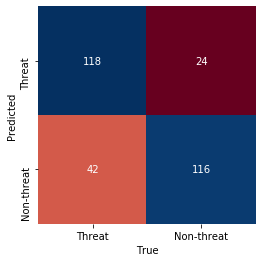

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
abc_report(y_test, y_pred, probs)

In [15]:
print("Overall Accuracy : ", round(accuracy_score(y_test, y_pred) * 100, 2))
print("Precision Score : ", round(precision_score(y_test, y_pred, average='binary') * 100, 2))
print("Recall Score : ", round(recall_score(y_test, y_pred, average='binary') * 100, 2))

Overall Accuracy :  78.0
Precision Score :  82.86
Recall Score :  73.42


TESTING ON THE GIVEN INPUT

In [16]:
NLP1=["Bitch stop it"]
print(abc.predict(tfidf.transform(NLP1)))

[1]


In [17]:
NLP2=["Hey how are you doing today"]
print(abc.predict(tfidf.transform(NLP2)))

[0]


# Using Bag of Words

In [18]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer   
# To extract max 1500 feature.max_features is attribute to experiment with to get better results 
cv = CountVectorizer(max_features = 1500)   
# X contains corpus (dependent variable) 
X = cv.fit_transform(df.cleanText).toarray()   
# y contains answers if review is positive or negative 
y = df.iloc[:, 1].values 
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
#split the data
from sklearn.model_selection import train_test_split
X_train_bo, x_test_bo, Y_train_bo, y_test_bo= train_test_split(X,y, test_size = 0.3, random_state =0)

In [20]:
#MODEL
from sklearn.linear_model import LogisticRegressionCV
abcd= LogisticRegressionCV(cv=5,
                         scoring='accuracy',
                         random_state=0,
                         n_jobs=-1,
                         verbose=3,
                         max_iter=300).fit(X_train_bo, Y_train_bo)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished


In [21]:
abcd.score(x_test_bo,y_test_bo)

0.7766666666666666


 Confusion Matrix


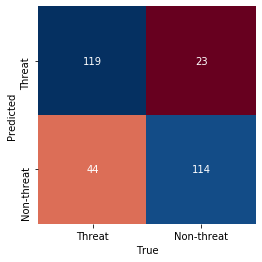

In [22]:

y_pred_bo = abcd.predict(x_test_bo)
probss = abcd.predict_proba(x_test_bo)
cmd = confusion_matrix(y_test_bo, y_pred_bo)
abc_report(y_test_bo, y_pred_bo, probss)

In [23]:
y_pred_bo

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], d

In [24]:
print("Overall Accuracy : ", round(accuracy_score(y_test_bo, y_pred_bo) * 100, 2))
print("Precision Score : ", round(precision_score(y_test_bo, y_pred_bo, average='binary') * 100, 2))
print("Recall Score : ", round(recall_score(y_test_bo, y_pred_bo, average='binary') * 100, 2))

Overall Accuracy :  77.67
Precision Score :  83.21
Recall Score :  72.15


TESTING ON THE GIVEN INPUT

In [25]:
#if the out put is 0 then the text is safe for the user. If it is one then parental guidance is needed.
NLP=["hi how are you doing today"]
print(abcd.predict(cv.transform(NLP)))

[0]


In [26]:
NLP1=["Bitch stop it"]
print(abcd.predict(cv.transform(NLP1)))

[1]


# Accuracy Comparison

In [27]:
print("TFIDF ACCURACY : ", round(accuracy_score(y_test, y_pred) * 100, 2) )
print("BOW ACCURACY : ", round(accuracy_score(y_test_bo, y_pred_bo) * 100, 2))

TFIDF ACCURACY :  78.0
BOW ACCURACY :  77.67
